# Analyzing Mental Health Discourse during the Covid-19 Pandemic

## Overall Project Description

### The purpose of this project is to examine public posts about symptoms related to anxiety, depression, and covid throughout the rise of the Covid-19 pandemic (i.e., from 11-01-2018 to 09-26-2020). 

### The data were scraped from the Anxiety Disorder, Depression, and Covid forums on Patient.Info using Scrapy. In these forums, individuals post about their symptoms and receive responses from community members who vary in levels of expertise. The dataset includes the date of the original post, the number of followers, likes, and replies, as well as the post text, the post title, and the reply text.

### The primary purpose of this project was to compare posts throughout the rise of the covid pandemic. The results of these analyses can be used by doctors and hospitals to enhance communication with patients who may be experiencing anxiety or depression related to Covid-19. Effective communication with patients can increase patient satisfaction.

# Important packages and read the data

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets
import re

In [2]:
patient = pd.read_csv('patient.csv')

In [3]:
patient.shape

(4901, 10)

In [4]:
patient.dtypes

group            object
num_following     int64
num_replies       int64
post_date        object
post_likes        int64
post_text        object
post_title       object
post_user        object
reply_text       object
reply_user       object
dtype: object

# Clean the data and prepare text for analysis using natural language processing 

### Use of Natural Language Processing

In [5]:
patient['reply_text'] = patient['reply_text'].fillna('')
# Replace `removed` and `deleted` with empty string
tbr = ['[removed]', '[deleted]']
patient['reply_text'] = patient['reply_text'].apply(lambda x: '' if x in tbr else x)

In [6]:
patient['reply_user'] = patient['reply_user'].fillna('')
# Replace `removed` and `deleted` with empty string
tbr = ['[removed]', '[deleted]']
patient['reply_user'] = patient['reply_user'].apply(lambda x: '' if x in tbr else x)

In [7]:
patient['post_text'] = patient['post_text'].fillna('')
# Replace `removed` and `deleted` with empty string
tbr = ['[removed]', '[deleted]']
patient['post_text'] = patient['post_text'].apply(lambda x: '' if x in tbr else x)

In [8]:
patient['reply_text'] = patient['post_title'] + ' ' + patient['reply_text']

In [9]:
patient['post_text'] = patient['post_title'] + ' ' + patient['post_text']

In [10]:
import re

# Convert all the string to lower cases
patient['post_text'] = patient['post_text'].str.lower()
# \S+ means anything that is not an empty space
patient['post_text'] = patient['post_text'].apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
patient['post_text'] = patient['post_text'].apply(lambda x: re.sub('\s+', ' ', x))

In [11]:
patient['post_text'] = patient['post_text'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [12]:
# Convert all the string to lower cases
patient['reply_text'] = patient['reply_text'].str.lower()
# \S+ means anything that is not an empty space
patient['reply_text'] = patient['reply_text'].apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
patient['reply_text'] = patient['reply_text'].apply(lambda x: re.sub('\s+', ' ', x))

## Coding depression

In [13]:
patient['hopeless'] = patient['post_text'].str.contains("hopeless", na=False)*1
patient['discouraged'] = patient['post_text'].str.contains("discouraged", na=False)*1
patient['lost interest'] = patient['post_text'].str.contains("lost interest | no interest", na=False)*1
patient['lonely'] = patient['post_text'].str.contains("lonely | alone", na=False)*1
patient['unhappy'] = patient['post_text'].str.contains("unhappy", na=False)*1
patient['sad'] = patient['post_text'].str.contains("sad", na=False)*1
patient['dissatisfied'] = patient['post_text'].str.contains("dissatisf | unsatisf", na=False)*1
patient['bored'] = patient['post_text'].str.contains("bored", na=False)*1
patient['failure'] = patient['post_text'].str.contains("failure | fail", na=False)*1
patient['distraught'] = patient['post_text'].str.contains("distraught", na=False)*1
patient['guilty'] = patient['post_text'].str.contains("guilt", na=False)*1
patient['irritation'] = patient['post_text'].str.contains("irritat", na=False)*1
patient['tired'] = patient['post_text'].str.contains("tired | fatigue", na=False)*1
patient['cry'] = patient['post_text'].str.contains("cry", na=False)*1
patient['energy'] = patient['post_text'].str.contains("energy", na=False)*1
patient['appetite'] = patient['post_text'].str.contains("appetite", na=False)*1
patient['depression'] = patient['post_text'].str.contains("depress", na=False)*1

In [14]:
patient.dtypes

group            object
num_following     int64
num_replies       int64
post_date        object
post_likes        int64
post_text        object
post_title       object
post_user        object
reply_text       object
reply_user       object
hopeless          int64
discouraged       int64
lost interest     int64
lonely            int64
unhappy           int64
sad               int64
dissatisfied      int64
bored             int64
failure           int64
distraught        int64
guilty            int64
irritation        int64
tired             int64
cry               int64
energy            int64
appetite          int64
depression        int64
dtype: object

In [15]:
patient['depression words']= patient.iloc[:, -17:-1].sum(axis=1)

In [16]:
patient.dtypes

group               object
num_following        int64
num_replies          int64
post_date           object
post_likes           int64
post_text           object
post_title          object
post_user           object
reply_text          object
reply_user          object
hopeless             int64
discouraged          int64
lost interest        int64
lonely               int64
unhappy              int64
sad                  int64
dissatisfied         int64
bored                int64
failure              int64
distraught           int64
guilty               int64
irritation           int64
tired                int64
cry                  int64
energy               int64
appetite             int64
depression           int64
depression words     int64
dtype: object

## Coding Anxiety

In [17]:
patient['fear'] = patient['post_text'].str.contains("fear | afraid | terrif | scare", na=False)*1
patient['nervous'] = patient['post_text'].str.contains("nervous", na=False)*1
patient['anxiety'] = patient['post_text'].str.contains("anxious | anxiety", na=False)*1
patient['lonely'] = patient['post_text'].str.contains("lonely | alone", na=False)*1
patient['tightness'] = patient['post_text'].str.contains("tightness", na=False)*1
patient['faint'] = patient['post_text'].str.contains("dizzy | lightheaded | faint", na=False)*1
patient['breath'] = patient['post_text'].str.contains("breath | chok", na=False)*1
patient['heart racing'] = patient['post_text'].str.contains("heart racing", na=False)*1
patient['panic'] = patient['post_text'].str.contains("panic", na=False)*1
patient['trembling'] = patient['post_text'].str.contains("tremb | shake", na=False)*1
patient['swallow'] = patient['post_text'].str.contains("swallo", na=False)*1
patient['flushed'] = patient['post_text'].str.contains("flushed | sweat", na=False)*1
patient['weak'] = patient['post_text'].str.contains("weak", na=False)*1
patient['tingling'] = patient['post_text'].str.contains("tingl | numb", na=False)*1
patient['chest pain'] = patient['post_text'].str.contains("chest pain", na=False)*1
patient['fidgety'] = patient['post_text'].str.contains("fidgety", na=False)*1


In [18]:
patient.dtypes

group               object
num_following        int64
num_replies          int64
post_date           object
post_likes           int64
post_text           object
post_title          object
post_user           object
reply_text          object
reply_user          object
hopeless             int64
discouraged          int64
lost interest        int64
lonely               int64
unhappy              int64
sad                  int64
dissatisfied         int64
bored                int64
failure              int64
distraught           int64
guilty               int64
irritation           int64
tired                int64
cry                  int64
energy               int64
appetite             int64
depression           int64
depression words     int64
fear                 int64
nervous              int64
anxiety              int64
tightness            int64
faint                int64
breath               int64
heart racing         int64
panic                int64
trembling            int64
s

In [19]:
patient['anxiety words']= patient.iloc[:, -15:-1].sum(axis=1)

In [20]:
patient = patient.drop(['hopeless', 'discouraged','lost interest','lonely','unhappy','sad','dissatisfied','bored','failure','distraught','guilty','irritation','tired','cry','energy','appetite','depression','fear','nervous','anxiety','tightness','faint','breath','heart racing','panic','trembling','swallow','flushed','weak','tingling','chest pain','fidgety'], axis=1)

In [21]:
patient.dtypes

group               object
num_following        int64
num_replies          int64
post_date           object
post_likes           int64
post_text           object
post_title          object
post_user           object
reply_text          object
reply_user          object
depression words     int64
anxiety words        int64
dtype: object

## Code Economy Stressor

In [22]:
patient['job'] = patient['post_text'].str.contains("job", na=False)*1
patient['economy'] = patient['post_text'].str.contains("econom", na=False)*1
patient['money'] = patient['post_text'].str.contains("money", na=False)*1
patient['finance'] = patient['post_text'].str.contains("financ", na=False)*1
patient['homeless'] = patient['post_text'].str.contains("homeless", na=False)*1
patient['bills'] = patient['post_text'].str.contains("bill", na=False)*1
patient['rent'] = patient['post_text'].str.contains("rent", na=False)*1
patient['stimulus'] = patient['post_text'].str.contains("stimulus", na=False)*1

In [23]:
patient.dtypes

group               object
num_following        int64
num_replies          int64
post_date           object
post_likes           int64
post_text           object
post_title          object
post_user           object
reply_text          object
reply_user          object
depression words     int64
anxiety words        int64
job                  int64
economy              int64
money                int64
finance              int64
homeless             int64
bills                int64
rent                 int64
stimulus             int64
dtype: object

In [24]:
patient['economy words']= patient.iloc[:, -8:-1].sum(axis=1)

In [25]:
patient = patient.drop(['job', 'economy','money','finance','homeless','bills','rent','stimulus'], axis=1)

## Code Social Distance Stressor

In [26]:
patient['isolation'] = patient['post_text'].str.contains("isolat", na=False)*1
patient['distance'] = patient['post_text'].str.contains("distanc", na=False)*1
patient['trapped'] = patient['post_text'].str.contains("trap", na=False)*1
patient['fatigue'] = patient['post_text'].str.contains("fatigue", na=False)*1

In [27]:
patient.dtypes

group               object
num_following        int64
num_replies          int64
post_date           object
post_likes           int64
post_text           object
post_title          object
post_user           object
reply_text          object
reply_user          object
depression words     int64
anxiety words        int64
economy words        int64
isolation            int64
distance             int64
trapped              int64
fatigue              int64
dtype: object

In [28]:
patient['social distance words'] = patient.iloc[:, -4:-1].sum(axis=1)

In [29]:
patient = patient.drop(['isolation', 'distance','trapped','fatigue'], axis=1)

In [30]:
patient.columns

Index(['group', 'num_following', 'num_replies', 'post_date', 'post_likes',
       'post_text', 'post_title', 'post_user', 'reply_text', 'reply_user',
       'depression words', 'anxiety words', 'economy words',
       'social distance words'],
      dtype='object')

## Create new fields in the dataframe to code for posts that include covid-related discourse

In [31]:
patient['covid'] = patient['post_text'].str.contains("covid | coronavirus | pandemic | quarantine | shutdown | cases | contagious | virus | corona | tested", na=False)*1

## Create datetime field and filter data by date

### Only include dates that span the covid pandemic

In [32]:
import datetime
from datetime import date

In [33]:
patient['datetime'] = pd.to_datetime(patient['post_date'])

In [34]:
mask = (patient['datetime'] > "2018-11-01") & (patient['datetime'] <= "2020-09-25")
filtered_dates = patient.loc[mask].reset_index(drop = True)

In [35]:
patient.shape

(4901, 16)

In [36]:
filtered_dates.shape

(4180, 16)

In [37]:
filtered_dates["year"] = filtered_dates['datetime'].dt.year

In [38]:
filtered_dates["month"] = filtered_dates['datetime'].dt.month

In [39]:
filtered_dates.to_csv('patient_info_data.csv')

### Create groups within the forums 

In [40]:
covid_group = filtered_dates[(filtered_dates['group'] == 'Coronavirus (COVID-19)')]
depression_group = filtered_dates[(filtered_dates['group'] == 'Depression')]
anxiety_group = filtered_dates[(filtered_dates['group'] == 'Anxiety Disorders')]
noncovid_anxiety = filtered_dates[(filtered_dates['covid']==0) & (filtered_dates['group'] == 'Anxiety Disorders')]
covid_anxiety = filtered_dates[(filtered_dates['covid']==1) & (filtered_dates['group'] == 'Anxiety Disorders')]
depression_group_covid = filtered_dates[(filtered_dates['group'] == 'Depression')&(filtered_dates['covid'] == 1)]
depression_group_noncovid = filtered_dates[(filtered_dates['group'] == 'Depression')&(filtered_dates['covid'] == 0)]

# DATE TRENDS

## Prepare the data for date trend plots

### Group data by forum, year, month and run descriptives

In [41]:
# Group data by year and month
filtereddates_groupyearmonth = filtered_dates.groupby(['group', 'year', 'month'])
filtereddates_groupyearmonth

In [42]:
filtereddates_groupyearmonth.head()

,group,num_following,num_replies,post_date,post_likes,post_text,post_title,post_user,reply_text,reply_user,depression words,anxiety words,economy words,social distance words,covid,datetime,year,month
0,Anxiety Disorders,2,1,2020-07-06,0,gerdacid reflux anyone else developed heartbur...,GERD/Acid Reflux?,MILAO,gerd/acid reflux? [['yes. the best thing you c...,jan34534,0,1,0,0,0,2020-07-06,2020,7
1,Anxiety Disorders,3,2,2020-07-18,0,anxiety just started taking l tryptophan earli...,Anxiety,kevin97981,anxiety [['tryptophan is found in a regular di...,"kyle99,kevin97981",0,1,0,0,0,2020-07-18,2020,7
2,Anxiety Disorders,2,1,2020-07-29,0,heart stopping have have acid reflux bad and l...,Heart stopping,mary91559,heart stopping [['your heart is not going to s...,jan34534,0,0,0,0,0,2020-07-29,2020,7
3,Anxiety Disorders,2,7,2020-08-12,0,imagining pinworm symptoms i had anal itch for...,Imagining pinworm symptoms,dianne18909,imagining pinworm symptoms [['i do think this ...,"kyle99,dianne18909,kyle99,dianne18909,kyle99,d...",0,0,1,0,0,2020-08-12,2020,8
4,Anxiety Disorders,4,4,2020-08-24,0,so scary this has to be more than anxiety i wa...,So scary. This has to be more than anxiety,t53062,so scary. this has to be more than anxiety [['...,"jan34534,MILAO,Mitchrom,MILAO",0,3,0,0,0,2020-08-24,2020,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124,Depression,5,4,2020-01-07,0,dysthymia chronic depression any one here wit...,dysthymia “chronic depression “,ana99221,dysthymia “chronic depression “ [['yes definit...,"diane98246,ana99221,hypercat,ana99221",0,1,0,0,0,2020-01-07,2020,1
4125,Depression,7,12,2020-01-02,0,hopelessness anxiety im feeling depressed tire...,Hopelessness (anxiety),Contakt,"hopelessness (anxiety) [[""everything sounds ve...","diane98246,Contakt,lee12629,Contakt,lee12629,y...",2,2,0,0,0,2020-01-02,2020,1
4126,Depression,4,3,2020-01-08,0,should i pay to see a psychiatrist hello allt...,Should I pay to see a psychiatrist ?,rebecca11588,should i pay to see a psychiatrist ? [['hi reb...,"Emis_Moderator,ed75507,sam18386",0,1,2,0,0,2020-01-08,2020,1
4154,Depression,5,6,2019-12-11,0,i dont know whats going on im feeling sad mos...,I don't know what's going on.,if_only.,i don't know what's going on. [['has there be...,"Mrk9928,if_only.,nina87533,sam18386,diane98246...",2,0,0,0,0,2019-12-11,2019,12


In [43]:
# Create data set containing descriptive statistics for month/year
# Note that count is the total number of posts in the forum during a specific time period 
desc_by_date = filtereddates_groupyearmonth.agg(['count', 'sum', 'mean'])

### Create one column name for each column and reset the index

In [44]:
desc_by_date.columns = list(map(lambda x:'_'.join(x), desc_by_date.columns))

In [45]:
desc_by_date = desc_by_date.reset_index()

In [46]:
desc_by_date["year_month"] = desc_by_date['month'].map(str) + '-' + desc_by_date['year'].map(str)

In [47]:
desc_by_date.columns

Index(['group', 'year', 'month', 'num_following_count', 'num_following_sum',
       'num_following_mean', 'num_replies_count', 'num_replies_sum',
       'num_replies_mean', 'post_likes_count', 'post_likes_sum',
       'post_likes_mean', 'depression words_count', 'depression words_sum',
       'depression words_mean', 'anxiety words_count', 'anxiety words_sum',
       'anxiety words_mean', 'economy words_count', 'economy words_sum',
       'economy words_mean', 'social distance words_count',
       'social distance words_sum', 'social distance words_mean',
       'covid_count', 'covid_sum', 'covid_mean', 'year_month'],
      dtype='object')

### Create forum groups for plots

In [48]:
anxiety_date_group = desc_by_date[(desc_by_date['group'] == 'Anxiety Disorders')]
depression_date_group = desc_by_date[(desc_by_date['group'] == 'Depression')]
covid_date_group = desc_by_date[(desc_by_date['group'] == 'Coronavirus (COVID-19)')]

In [49]:
depression_date_group.head()

,group,year,month,num_following_count,num_following_sum,num_following_mean,num_replies_count,num_replies_sum,num_replies_mean,post_likes_count,...,economy words_count,economy words_sum,economy words_mean,social distance words_count,social distance words_sum,social distance words_mean,covid_count,covid_sum,covid_mean,year_month
28,Depression,2018,11,39,202,5.179487,39,245,6.282051,39,...,39,12,0.307692,39,1,0.025641,39,0,0.000000,11-2018
29,Depression,2018,12,30,158,5.266667,30,183,6.100000,30,...,30,10,0.333333,30,3,0.100000,30,1,0.033333,12-2018
30,Depression,2019,1,41,192,4.682927,41,227,5.536585,41,...,41,28,0.682927,41,2,0.048780,41,1,0.024390,1-2019
31,Depression,2019,2,15,78,5.200000,15,113,7.533333,15,...,15,6,0.400000,15,1,0.066667,15,1,0.066667,2-2019
32,Depression,2019,3,32,172,5.375000,32,201,6.281250,32,...,32,16,0.500000,32,2,0.062500,32,0,0.000000,3-2019


## Plots for visualizing changes in posts throughout the covid pandemic

In [50]:
import matplotlib.pyplot as plt

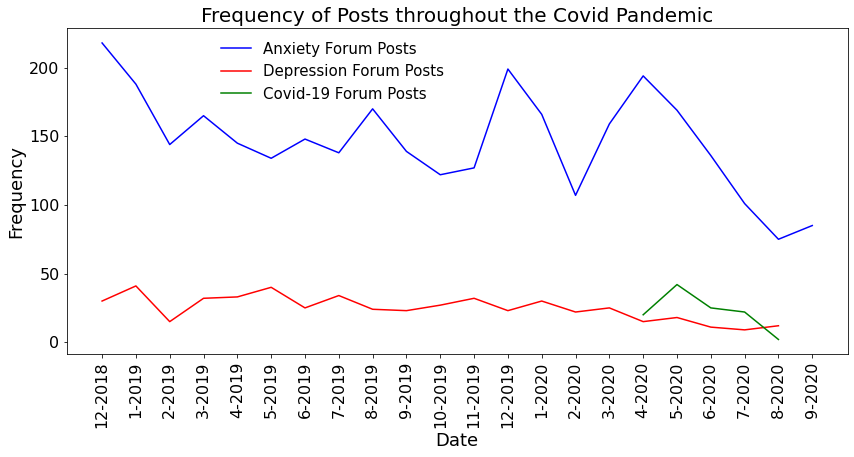

In [85]:
plt.figure(figsize=(14,6))
plt.plot(anxiety_date_group[~anxiety_date_group['year_month'].isin(['11-2018'])]['year_month'], anxiety_date_group[~anxiety_date_group['year_month'].isin(['11-2018'])]['num_following_count'], "b", label = "Anxiety Forum Posts")
plt.plot(depression_date_group[~depression_date_group['year_month'].isin(['11-2018'])]['year_month'], depression_date_group[~depression_date_group['year_month'].isin(['11-2018'])]['num_following_count'], "r", label = "Depression Forum Posts")
plt.plot(covid_date_group[~covid_date_group['year_month'].isin(['11-2018'])]['year_month'], covid_date_group[~covid_date_group['year_month'].isin(['11-2018'])]['num_following_count'], "g", label = "Covid-19 Forum Posts")
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(frameon=False, fontsize=15, loc="upper right", bbox_to_anchor=(.5, 1))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title("Frequency of Posts throughout the Covid Pandemic", fontsize=20)
plt.show()

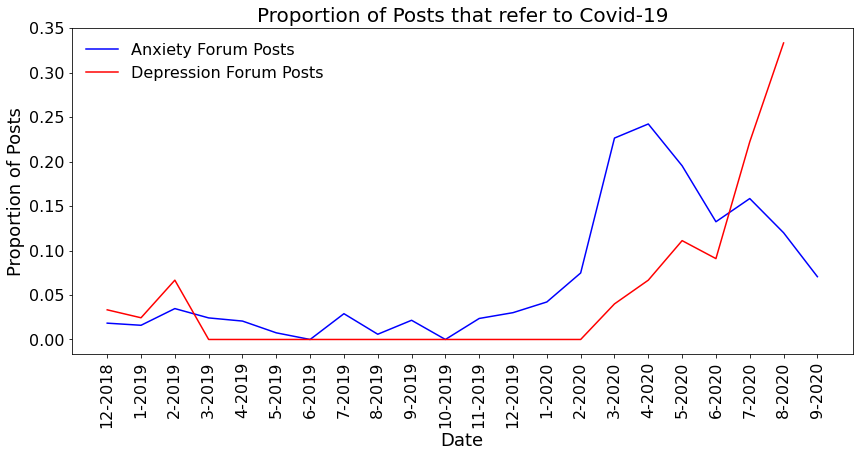

In [82]:
plt.figure(figsize=(14,6))
plt.plot(anxiety_date_group[~anxiety_date_group['year_month'].isin(['11-2018'])]['year_month'], anxiety_date_group[~anxiety_date_group['year_month'].isin(['11-2018'])]['covid_mean'], "b", label = "Anxiety Forum Posts")
plt.plot(depression_date_group[~depression_date_group['year_month'].isin(['11-2018'])]['year_month'], depression_date_group[~depression_date_group['year_month'].isin(['11-2018'])]['covid_mean'], "r", label = "Depression Forum Posts")
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(frameon=False, fontsize=16)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Proportion of Posts', fontsize=18)
plt.title("Proportion of Posts that refer to Covid-19", fontsize=20)
plt.show()

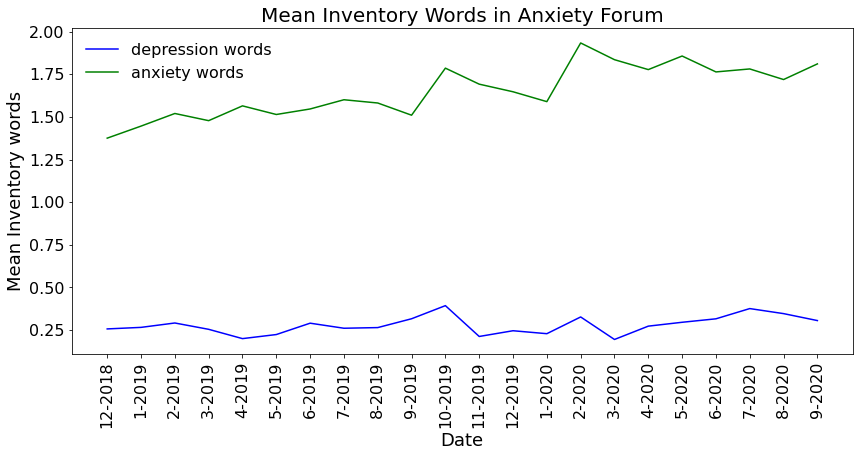

In [53]:
plt.figure(figsize=(14,6))
plt.plot(anxiety_date_group[~anxiety_date_group['year_month'].isin(['11-2018'])]['year_month'], anxiety_date_group[~anxiety_date_group['year_month'].isin(['11-2018'])]['depression words_mean'], "b", label = "depression words")
plt.plot(anxiety_date_group[~anxiety_date_group['year_month'].isin(['11-2018'])]['year_month'], anxiety_date_group[~anxiety_date_group['year_month'].isin(['11-2018'])]['anxiety words_mean'], "g", label = "anxiety words")
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(frameon=False, fontsize=16)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Mean Inventory words', fontsize=18)
plt.title("Mean Inventory Words in Anxiety Forum", fontsize=20)
plt.show()

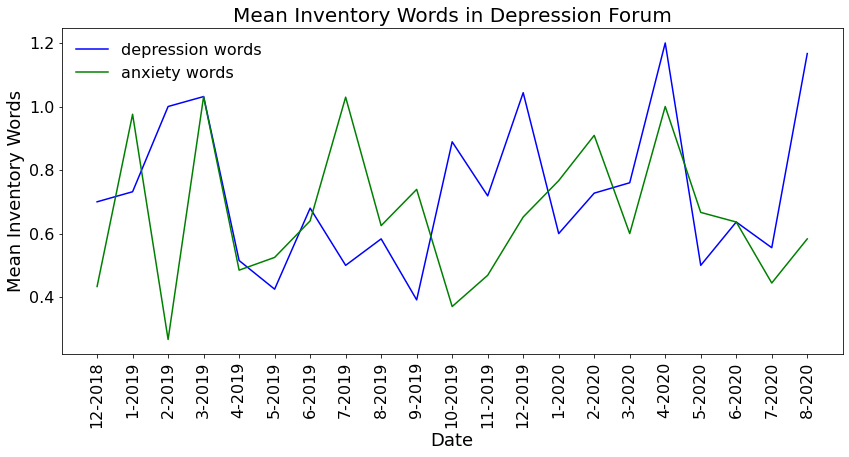

In [54]:
plt.figure(figsize=(14,6))
plt.plot(depression_date_group[~depression_date_group['year_month'].isin(['11-2018'])]['year_month'], depression_date_group[~depression_date_group['year_month'].isin(['11-2018'])]['depression words_mean'], "b", label = "depression words")
plt.plot(depression_date_group[~depression_date_group['year_month'].isin(['11-2018'])]['year_month'], depression_date_group[~depression_date_group['year_month'].isin(['11-2018'])]['anxiety words_mean'], "g", label = "anxiety words")
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(frameon=False, fontsize=16)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Mean Inventory Words', fontsize=18)
plt.title("Mean Inventory Words in Depression Forum", fontsize=20)
plt.show()

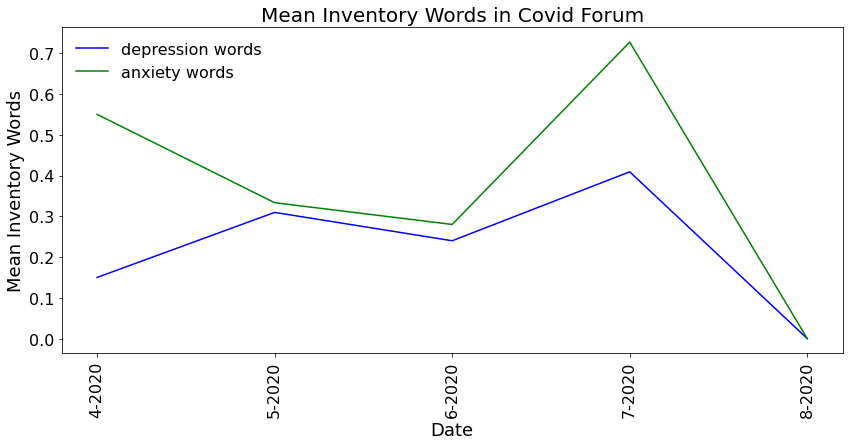

In [55]:
plt.figure(figsize=(14,6))
plt.plot(covid_date_group['year_month'], covid_date_group['depression words_mean'], "b", label = "depression words")
plt.plot(covid_date_group['year_month'], covid_date_group['anxiety words_mean'], "g", label = "anxiety words")
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(frameon=False, fontsize=16)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Mean Inventory Words', fontsize=18)
plt.title("Mean Inventory Words in Covid Forum", fontsize=20)
plt.show()

# compare pre and during covid

In [56]:
precovid_mask = (patient['datetime'] > "2019-03-01") & (patient['datetime'] <= "2019-09-25")
precovid_dates = patient.loc[precovid_mask].reset_index(drop = True)
precovid_dates["year"] = precovid_dates['datetime'].dt.year
precovid_dates["month"] = precovid_dates['datetime'].dt.month

In [57]:
precovid_depression_group = precovid_dates[(precovid_dates['group'] == 'Depression')]
precovid_anxiety_group = precovid_dates[(precovid_dates['group'] == 'Anxiety Disorders')]

In [58]:
covid_mask = (patient['datetime'] > "2020-03-01") & (patient['datetime'] <= "2020-09-25")
covid_dates = patient.loc[covid_mask].reset_index(drop = True)
covid_dates["year"] = covid_dates['datetime'].dt.year
covid_dates["month"] = covid_dates['datetime'].dt.month

In [59]:
covid_depression_group = covid_dates[(covid_dates['group'] == 'Depression')]
covid_anxiety_group = covid_dates[(covid_dates['group'] == 'Anxiety Disorders')]

In [60]:
from scipy import stats

In [61]:
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

In [62]:
stats.ttest_ind(precovid_depression_group['depression words'], covid_depression_group['depression words'])

Ttest_indResult(statistic=-1.9553965229320298, pvalue=0.05148018469287632)

In [63]:
precovid_depression_group['depression words'].mean()

0.5817307692307693

In [64]:
covid_depression_group['depression words'].mean()

0.8089887640449438

In [65]:
stats.ttest_ind(precovid_depression_group['anxiety words'], covid_depression_group['anxiety words'])

Ttest_indResult(statistic=0.48980686444249155, pvalue=0.6246346144306865)

In [66]:
precovid_depression_group['anxiety words'].mean()

0.7307692307692307

In [67]:
covid_depression_group['anxiety words'].mean()

0.6629213483146067

In [68]:
stats.ttest_ind(precovid_anxiety_group['depression words'], covid_anxiety_group['depression words'])

Ttest_indResult(statistic=-1.1403451495889887, pvalue=0.25428543084750965)

In [69]:
precovid_anxiety_group['depression words'].mean()

0.25925925925925924

In [70]:
covid_anxiety_group['depression words'].mean()

0.2899343544857768

In [71]:
stats.ttest_ind(precovid_anxiety_group['anxiety words'], covid_anxiety_group['anxiety words'])

Ttest_indResult(statistic=-4.114559227791147, pvalue=4.043965751683474e-05)

In [72]:
precovid_anxiety_group['anxiety words'].mean()

1.5525525525525525

In [73]:
covid_anxiety_group['anxiety words'].mean()

1.7910284463894968

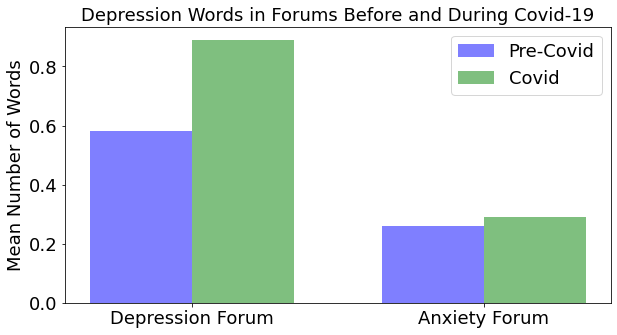

In [74]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

# data to plot
n_groups = 2
pre_covid = (.58, .26)
covid = (.89, .29)

# create plot
fig, ax = plt.subplots(figsize = (9,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.5

rects1 = plt.bar(index, pre_covid, bar_width,
alpha=opacity,
color='b',
label='Pre-Covid')

rects2 = plt.bar(index + bar_width, covid, bar_width,
alpha=opacity,
color='g',
label='Covid')

#plt.xlabel('Person')
plt.ylabel('Mean Number of Words', fontsize=18)

plt.title('Depression Words in Forums Before and During Covid-19', fontsize=18)
plt.xticks(index + bar_width/2, ('Depression Forum', 'Anxiety Forum'), fontsize=18)
plt.legend()

plt.tight_layout()
plt.show()

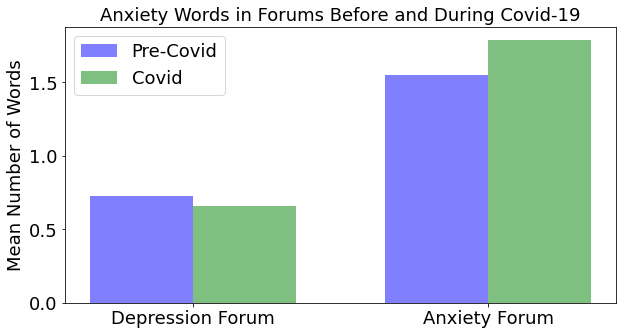

In [75]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

# data to plot
n_groups = 2
pre_covid = (.73, 1.55)
covid = (.66, 1.79)

# create plot
fig, ax = plt.subplots(figsize = (9,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.5

rects1 = plt.bar(index, pre_covid, bar_width,
alpha=opacity,
color='b',
label='Pre-Covid')

rects2 = plt.bar(index + bar_width, covid, bar_width,
alpha=opacity,
color='g',
label='Covid')

#plt.xlabel('Person')
plt.ylabel('Mean Number of Words', fontsize=18)

plt.title('Anxiety Words in Forums Before and During Covid-19', fontsize=18)
plt.xticks(index + bar_width/2, ('Depression Forum', 'Anxiety Forum'), fontsize=18)
plt.legend()

plt.tight_layout()
plt.show()

## Stressor - Inventory correlations

### All forums combined

In [76]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [77]:
print(len(precovid_anxiety_group))
print(len(covid_anxiety_group))
print(len(precovid_depression_group))
print(len(covid_depression_group))

999
914
208
89


In [87]:
covid_dates_corr = covid_dates[['depression words', 'anxiety words', 'economy words']]
corr1 = covid_dates_corr.corr()

In [88]:
corr1.style.background_gradient(cmap='coolwarm', axis=None)

,depression words,anxiety words,economy words
depression words,1.000000,0.125928,0.229453
anxiety words,0.125928,1.000000,0.156141
economy words,0.229453,0.156141,1.000000


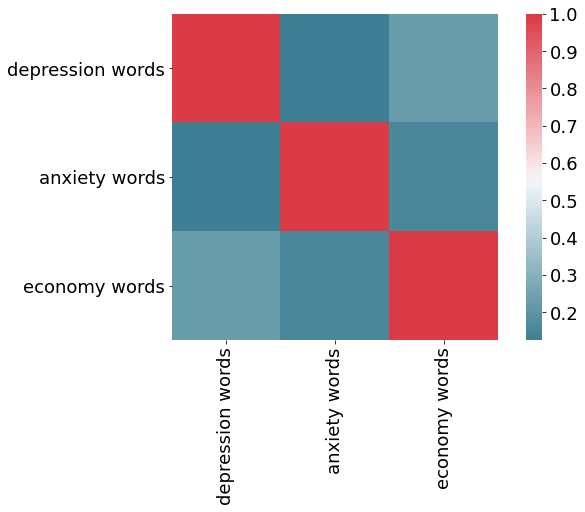

In [89]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr1, mask=np.zeros_like(corr1, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

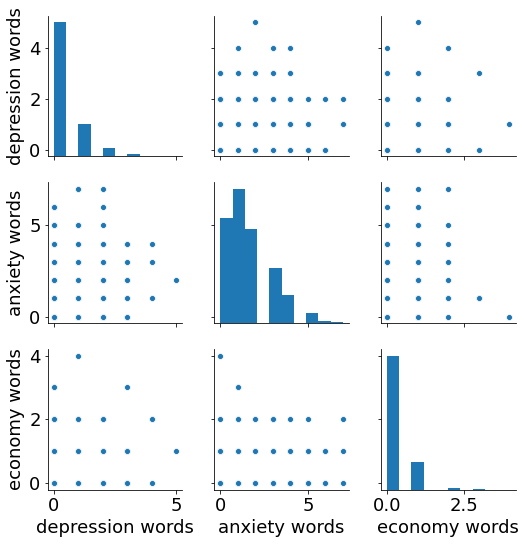

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
#rs = np.random.RandomState(0)
#df = pd.DataFrame(rs.rand(10, 10))
sns.pairplot(covid_dates_corr)

In [91]:
pearsonr(covid_dates['depression words'], covid_dates['economy words'])

(0.2294525794733862, 8.944290938905722e-15)

In [92]:
pearsonr(covid_dates['anxiety words'], covid_dates['economy words'])

(0.15614102748884717, 1.6252968050347664e-07)

In [93]:
pearsonr(covid_dates['depression words'], covid_dates['social distance words'])

(0.0820686062640287, 0.006130410002556749)

In [94]:
pearsonr(covid_dates['anxiety words'], covid_dates['social distance words'])

(0.03267260979144461, 0.27590325965031226)

## Write filtered_dates file to csv to read in for word clouds and chi-square analyses

In [ ]:
filtered_dates.to_csv('filtered_dates.csv', index=False)